In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Arthur Henrique Silva Carvalho
## Matrícula: 211026673

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [17]:
#Código das funções utilizadas.

# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

Para uma frequência de $\frac{1}{4}$ $Hz$, amostramos $x(t)$ de $0$ a $4$ com $\frac{4-0}{\frac{1}{8}} = 32$ amostras.

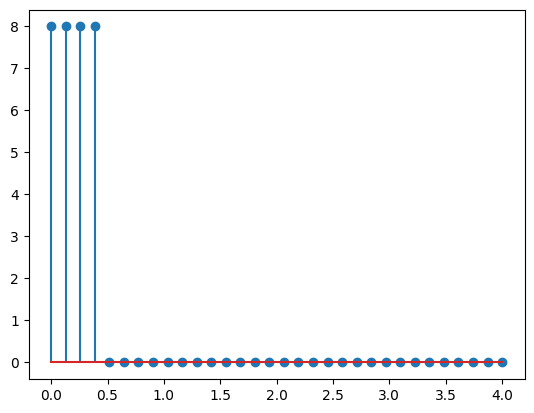

In [4]:
def ret(n: int) -> float:
    if n > 0.5:
        return 0
    if n == 0.5:
        return 0.5
    return 1


nsamples = 32
n = np.linspace(0, 4, 32)
x_n = 8*np.array([ret(i) for i in n])
plt.stem(n, x_n)
plt.show()

## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

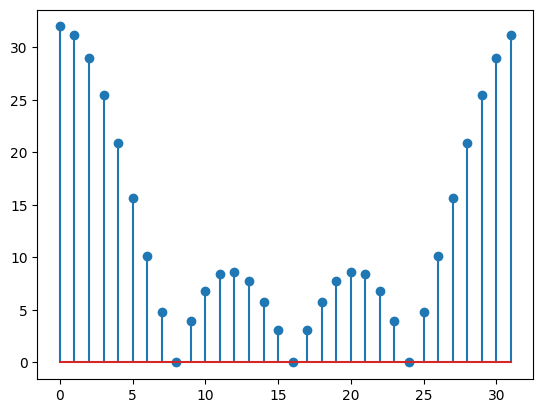

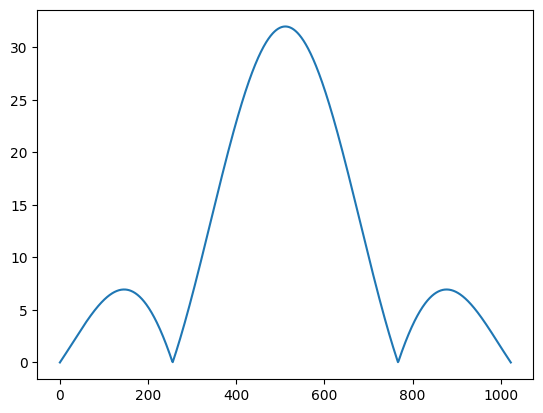

In [8]:
def dft(x: np.ndarray) -> np.ndarray:
    length = len(x)
    w_k = 2*np.pi/length
    response = np.zeros(length, dtype=complex)
    for i in range(length):
        for j in range(length):
            response[i] += x[j] * np.exp(-1j * j * w_k * i)
    return response


def sinc(x: np.ndarray) -> np.ndarray:
    length = len(x)
    sinc_n = np.zeros(length)
    for i in range(length):
        sinc_n[i] = np.sin(x[i])/x[i]
    return sinc_n


x_w_1 = abs(dft(x_n))
w = np.linspace(-4*np.pi, 4*np.pi, 1024)
x_w_2 = abs(32 * sinc(w/2))

plt.stem(x_w_1)
plt.show()
plt.plot(x_w_2)
plt.show()


Comparando-se os gráficos, obtivemos uma aparência razoavelmente similar, bastaria um deslocamento na DFT para se tornar idêntico a um $sinc$, que é a Transformada de Fourier da função $ret$.

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

In [20]:
#Resposta da questão 2a

## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

In [21]:
#Resposta da questão 2b

## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


In [22]:
#Resposta da questão 2c

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [23]:
#Resposta da questão 3

sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()
